## EE 123 iPython Notebook Tutorial Spring 2016   <small>       <br>         modified from Berkeley Python Bootcamp 2013 https://github.com/profjsb/python-bootcamp     <br>   and Python for Signal Processing http://link.springer.com/book/10.1007%2F978-3-319-01342-8          <br> - Frank Ong <frankong@berkeley.edu>     <br></small>

# Installing iPython Notebook

Follow the instructions on the class website to install python:

http://inst.eecs.berkeley.edu/~ee123/sp16/python_install.html

# iPython Notebook Navigation

### Run iPython notebook cell

The ipython notebook is divided into cells. Each cell can contain texts, codes or html scripts. Running a non-code cell simply advances to the next cell. To run a code cell using Shift-Enter or pressing the play button in the toolbar above:

In [1]:
1+2

3

### Interupting the kernel

For debugging, often we would like to interupt the current running process. This can be done by pressing the stop button. 

When a processing is running, the circle on the right upper corner is filled. When idle, the circle is empty.

In [2]:
import time

while(1):
    print("error")
    time.sleep(1)

error
error
error
error
error


KeyboardInterrupt: 

### Restarting the kernels

Interupting sometimes does not work. You can reset the state by restarting the kernel. This is done by clicking Kernel/Restart or the Refresh button in the toolbar above.

### Saving the notebook

To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows

### Undoing

### Tab Completion

To undo changes in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows

To undo `Delete Cell`, select `Edit->Undo Delete Cell`

One useful feature of iPython is tab completion 

In [3]:
one_plus_one = 1+1

# type `one_` then hit TAB will auto-complete the variable
print(one_plus_one)


2


### Help menu for functions

Another useful feature is the help command. Type any function followed by `?` returns a help window. Hit the `x` button to close it.

In [4]:
abs?

### Other iPython Notebook navigation tips

- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white plus button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

# Libraries

These are the libraries that we will be using in this class:
    
__Numpy__

NumPy is the fundamental package for scientific computing with Python.

__Scipy__

The SciPy library is a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.

__matplotlib__

matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

__bokeh__

Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Allows real-time plotting

__PyAudio__

PyAudio provides Python bindings for PortAudio, the cross-platform audio I/O library. With PyAudio, you can easily use Python to play and record audio on a variety of platforms.

__pyrtlsdr__

pyrtlsdr is a simple Python interface to devices supported by the RTL-SDR project, which turns certain USB DVB-T dongles employing the Realtek RTL2832U chipset into low-cost, general purpose software-defined radio receivers. It wraps all the functions in the librtlsdr library (including asynchronous read support), and also provides a more Pythonic API.

### Importing

To import a specific library `x`, simply type `import x`

To access the library function `f`, type `x.f`

If you want to change the library name to `y`, type `import x as y`


    

In [5]:
import numpy as np

np.ones((3,1))


array([[ 1.],
       [ 1.],
       [ 1.]])

# Data Types

### Floats and Integers

Unlike MATLAB, there is a difference between `int` and `float` in Python. Double slash division returns the (floor) integer number while single slash division returns a float number. Always check this when debugging!

In [6]:
1 // 4

0

In [7]:
1 / 4   #if Python 2 is used, this will return an integer 0

0.25

In [8]:
1 / 4.0

0.25

You can import division from the future when using Python 2, then everything works fine

In [9]:
from __future__ import division
1 / 4

0.25

### Strings

Unlike MATLAB/C, doubles quotes and single quotes are the same thing. Both represent strings. `'+'` concatenates strings

In [10]:
# This is a comment
"123 " + 'DSP'

'123 DSP'

### Lists

A list is a mutable array of data. That is we can change it after we create it. They can be created using square brackets []


Important functions: 

- `'+'` appends lists. 

- `len(x)` to get length

In [11]:
x = [1, 2, 3] + ["DSP"]

print(x)

[1, 2, 3, 'DSP']


In [12]:
print(len(x))

4


### Tuples

A tuple is an unmutable list. They can be created using round brackets (). 

They are usually used as inputs and outputs to functions

In [13]:
t = ("D", "S", "P") + (1, 2, 3)
print(t)

('D', 'S', 'P', 1, 2, 3)


In [14]:
# cannot do assignment
t[0] = 10

# errors in ipython notebook appear inline

TypeError: 'tuple' object does not support item assignment

### Numpy Array

Numpy array is like a list with multidimensional support and more functions. This will be the primary data structure in our class.

### Creating a numpy array

In [ ]:
x = np.array( [ [1, 2], [3 , 4] ] )

print(x)

### Getting the shape of array

In [ ]:
x.shape

### Elementwise operation

One major advantage of using numpy arrays is that arithmetic operations on numpy arrays correspond to elementwise operations. 

In [ ]:
print(x + 2)

### Matrix multiplication

You can use np.matrix to do matrix multiplication

In [ ]:
np.matrix(x) * np.matrix(x)


In [ ]:
# equivalent implementation
x.dot(x)

### Slicing numpy arrays

Numpy uses pass-by-reference semantics so it creates views into the existing array, without implicit copying. This is particularly helpful with very large arrays because copying can be slow.

In [ ]:
x = np.array([1,2,3,4,5,6])
print(x)

We slice an array from a to b-1 with `[a:b]`

In [ ]:
y = x[0:4]
print(y)

Because slicing does not copy the array, changing `y` changes `x`

In [ ]:
y[0] = 7
print(x)
print(y)

To actually copy x, we should use .copy()

In [ ]:
x = np.array([1,2,3,4,5,6])
y = x.copy()
y[0] = 7
print(x)
print(y)

### Useful Numpy function: r_

We use `r_` to create integer sequences in numpy arrays

`r_[0:N]` creates an array listing every integer from 0 to N-1

`r_[0:N:m]` creates an array listing every `m` th integer from 0 to N-1 

In [15]:
import numpy as np # by convention, import numpy as np
from numpy import r_ # import r_ function from numpy directly, so that we can call r_ directly instead of np.r_

print(np.r_[-5:5]) # every integer from -5 ... 4

print(np.r_[0:5:2]) # every other integer from 0 ... 4

[-5 -4 -3 -2 -1  0  1  2  3  4]
[0 2 4]


# Plotting

In this class, we will use `matplotlib.pyplot` to plot signals and images. 

By convention, we import `matplotlib.pyplot` as `plt`.

To display the plots inside the browser, we can use the command `%matplotlib inline` (display plots as png files) or `%matplotlib notebook` (generate an interactive canvas)

In [16]:

import matplotlib.pyplot as plt # by convention, we import pyplot as plt

# plot in browser instead of opening new windows
%matplotlib inline
# %matplotlib notebook
# might need to run the cell several times when you change the method from inline to notebook

In [17]:
# Generate signals
x = np.r_[:1:0.01] # if you don't specify a number before the colon, the starting index defaults to 0
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5

### Plotting one signal

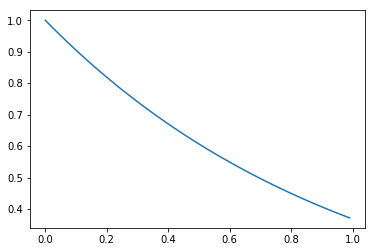

In [18]:
plt.figure()
plt.plot( x, y1 )

### Plotting multiple signals in one figure

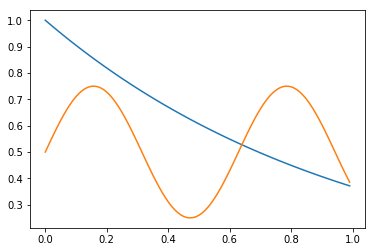

In [19]:
plt.figure()
plt.plot( x, y1 )
plt.plot( x, y2 )

### Plotting multiple signals in different figures

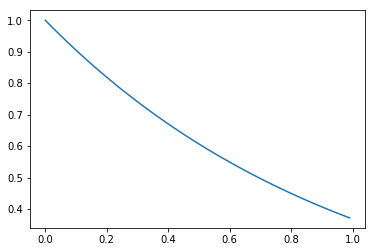

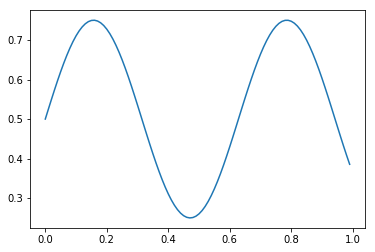

In [20]:
plt.figure()
plt.plot( x, y1 )
plt.figure()
plt.plot( x, y2 )

### You can also add title and legends using `plt.title()` and `plt.legend()`

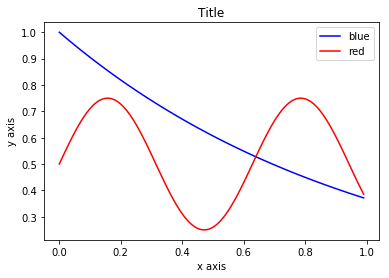

In [21]:
plt.figure()
plt.plot( x, y1, "b")
plt.plot( x, y2, "r" )
plt.xlabel( "x axis" )
plt.ylabel( "y axis" )

plt.title( "Title" )

plt.legend( ("blue", "red") )

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


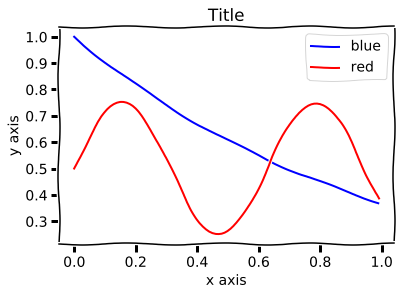

In [22]:
# xkcd style
with plt.xkcd() :
    plt.figure()
    plt.plot( x, y1, "b" )
    plt.plot( x, y2, "r" )
    plt.xlabel( "x axis" )
    plt.ylabel( "y axis" )

    plt.title( "Title" )

    plt.legend( ("blue", "red") )

### Showing images

`imshow` will be our default function to plot images

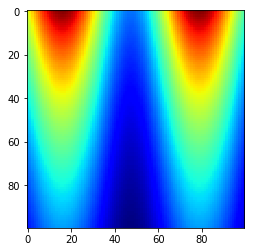

In [23]:
# image

image = np.outer( y1, y2 ) # plotting the outer product of y1 and y2

plt.figure()
plt.imshow(image, cmap="jet")


## That's all!